<a href="https://colab.research.google.com/github/karim-mttk/machine-learning-basics/blob/main/ML_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Decision Trees
## Objectives:
* Building Decision Trees with `sklearn` 

3 types of dataset:
* Training dataset
* Validation dataset
* Test set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.tree import plot_tree


In [3]:
url = "https://raw.githubusercontent.com/karim-mttk/machine-learning-basics/main/data/grade-toy-classification.csv"
classi_df = pd.read_csv(url)

* Setting the target and features: 

In [4]:
X = classi_df.drop(columns =["quiz2"])
y = classi_df["quiz2"]
X_bin = X.copy()
columns = ["lab1", "lab2", "lab3", "lab4", "quiz1"]
for col in columns:
  X_bin[col] = X_bin[col].apply(lambda x: 1 if x >= 90 else 0)
X_bin.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,1,1,0,1,1
1,1,0,1,1,0,0,1
2,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0
4,0,1,0,0,1,1,0


In [5]:
y.head()

0        A+
1    not A+
2    not A+
3        A+
4        A+
Name: quiz2, dtype: object

* Using `DummyClassifier` on quiz2 grade prediction:

In [6]:
#1. create dummy classifier model
dummy_clf = DummyClassifier(strategy="most_frequent")
#2. Fit the model
dummy_clf.fit(X_bin, y)
#3. Score the model
dummy_clf.score(X_bin, y)

0.5238095238095238

* Using `DecisionTreeClassifier` on quiz2:

In [7]:
from sklearn.tree import DecisionTreeClassifier

#1. Create a decision tree
model = DecisionTreeClassifier()
#2. fit the decision tree
model.fit(X_bin, y)
#3. score the model
model.score(X_bin, y)


0.9047619047619048

From the two models we can see that the `DecisionTreeClassifier` has a higher accuracy of 0.90 compared to `DummyClassfier` of 0.52

* Visualizing the `DecisionTreeModel`:

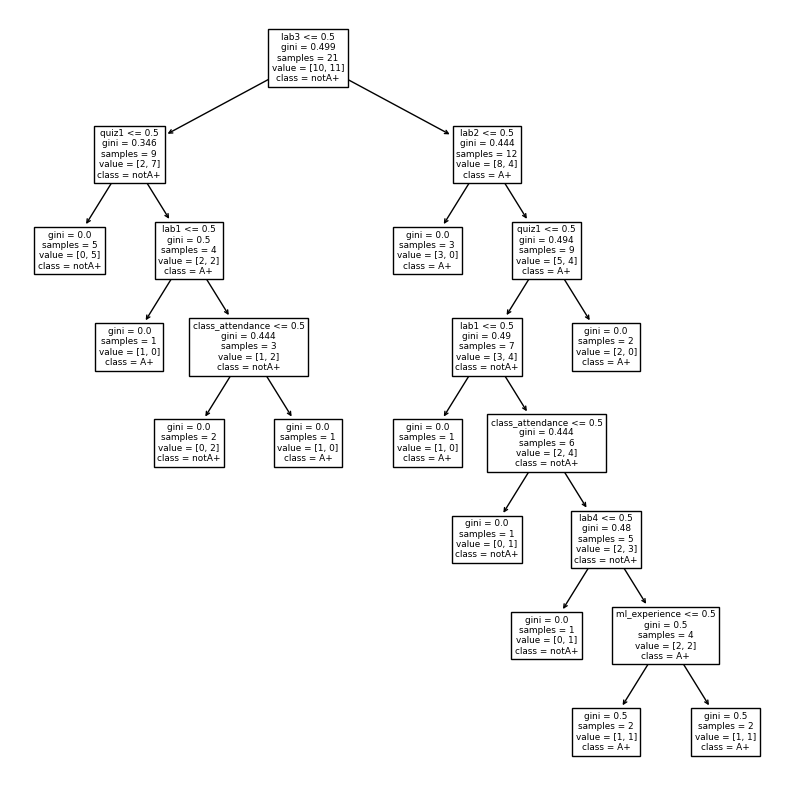

In [8]:
def display_tree(feature_names, tree):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_tree(tree, feature_names=feature_names, class_names=['A+', 'notA+'], ax=ax)

display_tree(X_bin.columns, model)    

* `predict` the model:

In [9]:
ex = np.array([[0, 1, 0, 0, 1, 1, 1]])
pd.DataFrame(data=ex, columns=X.columns)


,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,0,1,0,0,1,1,1


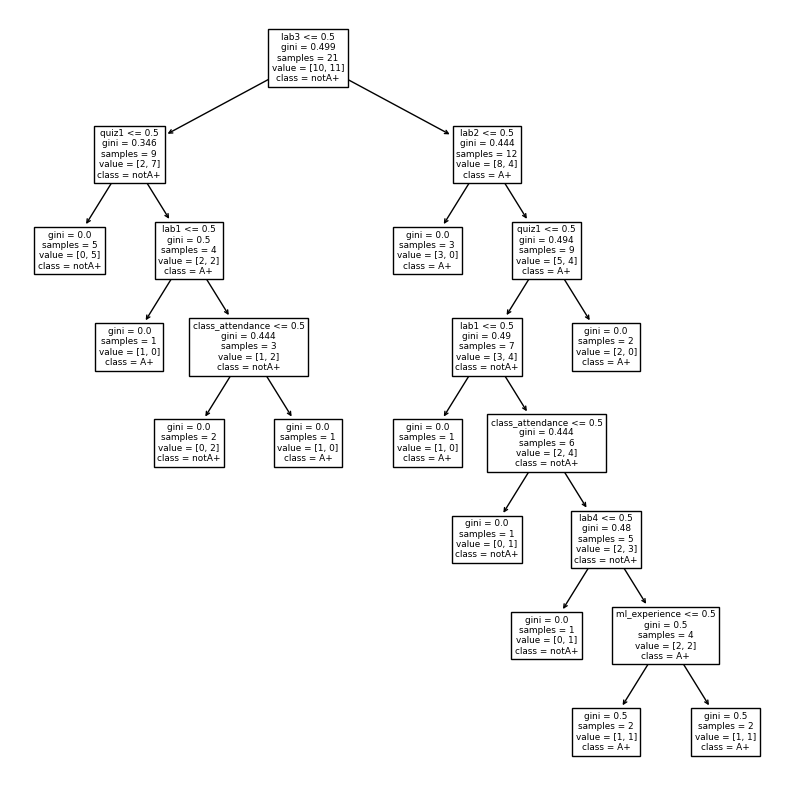

In [10]:
display_tree(X_bin.columns, model)

**Notes:** During prediction time, a learned decision tree is used by starting at the top and asking binary questions at each node to follow the appropriate path in the tree. Once you reach a leaf node, you will have the prediction. However, note that the model only takes into account the features included in the learned tree and disregards all other features.

* `fit` the model:

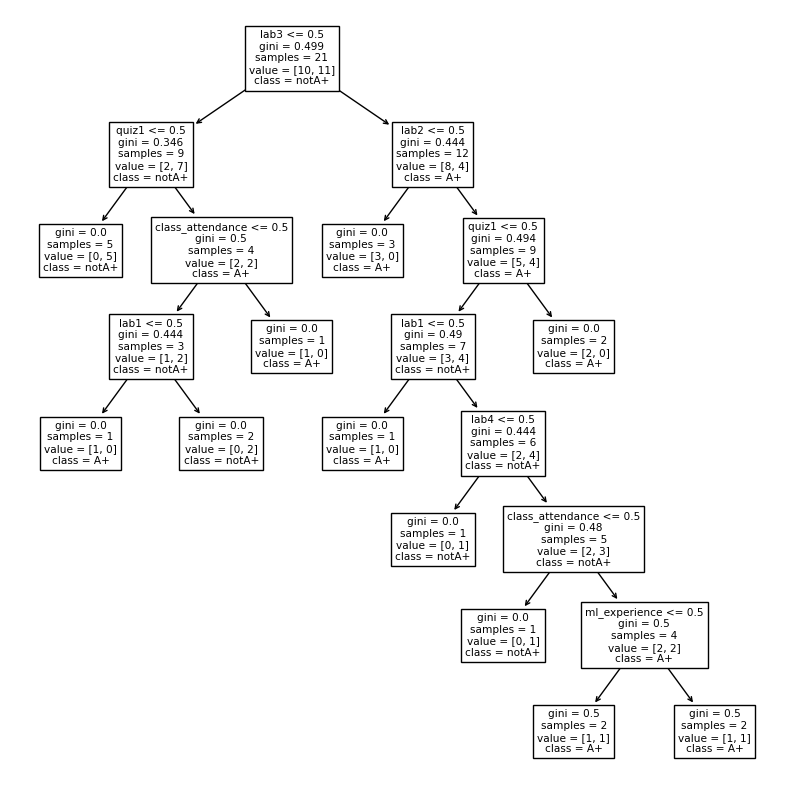

In [11]:
#1. Create the decision tree
model = DecisionTreeClassifier()
#2. fit the model
model.fit(X_bin, y)
#3. display the model
display_tree(X_bin.columns, model)

## Continuous Split Trees / Regression Trees/ Decision Trees with continous features:

In [12]:
X.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,92,93,84,91,92
1,1,0,94,90,80,83,91
2,0,0,78,85,83,80,80
3,0,1,91,94,92,91,89
4,0,1,77,83,90,92,85


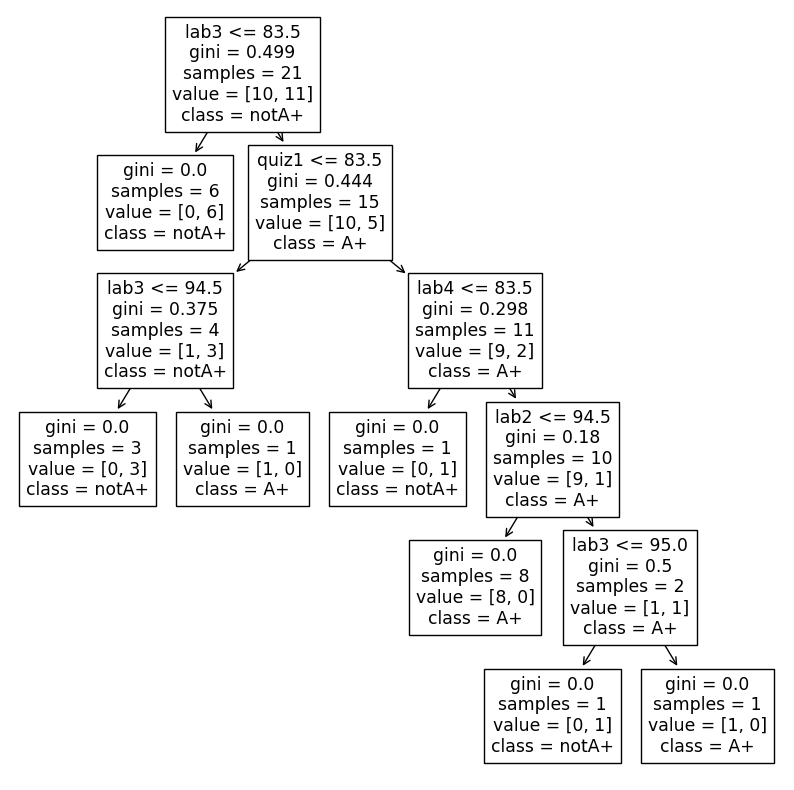

In [13]:
#1. Create model
model = DecisionTreeClassifier()
#2. Fit the model
model.fit(X, y)
#3. display_tree
display_tree(X.columns, model)

* `DecisionTreeRegressor`: 
  using mean squared error instead of gini. `fit` and `predict` similar to basic decision tree. `score` returns R^2, 1 is perfect correlation and -1 for negative correlations.  


In [23]:
regression_df = pd.read_csv(url)
regression_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+


In [25]:
regression_df['quiz2'].dtype

dtype('O')